# Project 4: Hackathon

## *Examining Classification Models on Hip-Hop Genre*

In this notebook:

* [Linear Regression](#lr)
* [Logistic Regression](#lgr)
* [Tree Models](#trees)
* [Support Vector Machines](#svm)
* [Evaluating the Models](#eval)


#### Import Libraries & Read in Data

In [1]:
## standard imports 
import pandas as pd 
import numpy as np
import re
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
## trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
## NLP
from sklearn.feature_extraction.text import CountVectorizer
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [2]:
### read in data
data = pd.read_csv('../data/hiphop.csv')
data.head()

,genre,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,is_popular
0,Hip-Hop,2JvzF1RMd7lE3KmFlsyZD8,0.14900,0.837,0.364,0.00000,0.2710,-11.713,0.2760,123.984,0.463,1
1,Hip-Hop,2IRZnDFmlqMuOrYOLnZZyc,0.25900,0.889,0.496,0.00000,0.2520,-6.365,0.0905,86.003,0.544,1
2,Hip-Hop,2t8yVaLvJ0RenpXUIAC52d,0.03950,0.837,0.636,0.00125,0.3420,-7.643,0.0860,145.972,0.274,1
3,Hip-Hop,79OEIr4J4FHV0O3KrhaXRb,0.00195,0.942,0.383,0.00000,0.0922,-8.099,0.5650,100.021,0.380,1
4,Hip-Hop,1xzBco0xcoJEDXktl7Jxrr,0.19400,0.729,0.625,0.00986,0.2480,-5.266,0.0315,146.034,0.261,1


### EDA & Visualizations

In [3]:
### check balance of classes
data['is_popular'].value_counts()

1    4891
0    4404
Name: is_popular, dtype: int64

In [4]:
data.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,is_popular
count,9295.000000,9295.000000,9295.000000,9295.000000,9295.000000,9295.000000,9295.000000,9295.000000,9295.000000,9295.000000
mean,0.176172,0.718808,0.643275,0.011200,0.201146,-6.860286,0.205396,120.791039,0.473381,0.526197
std,0.188891,0.130642,0.150037,0.073822,0.156169,2.449047,0.134865,29.755364,0.222325,0.499340
min,0.000015,0.201000,0.000243,0.000000,0.019600,-25.602000,0.024600,39.497000,0.033600,0.000000
25%,0.033000,0.639000,0.539000,0.000000,0.102000,-8.198000,0.085050,94.298000,0.300000,0.000000
50%,0.107000,0.735000,0.646000,0.000000,0.135000,-6.559000,0.191000,121.127000,0.469000,1.000000
75%,0.260000,0.816000,0.752000,0.000012,0.262000,-5.205000,0.297000,141.986500,0.642500,1.000000
max,0.985000,0.986000,0.995000,0.927000,0.989000,1.012000,0.932000,214.126000,0.979000,1.000000


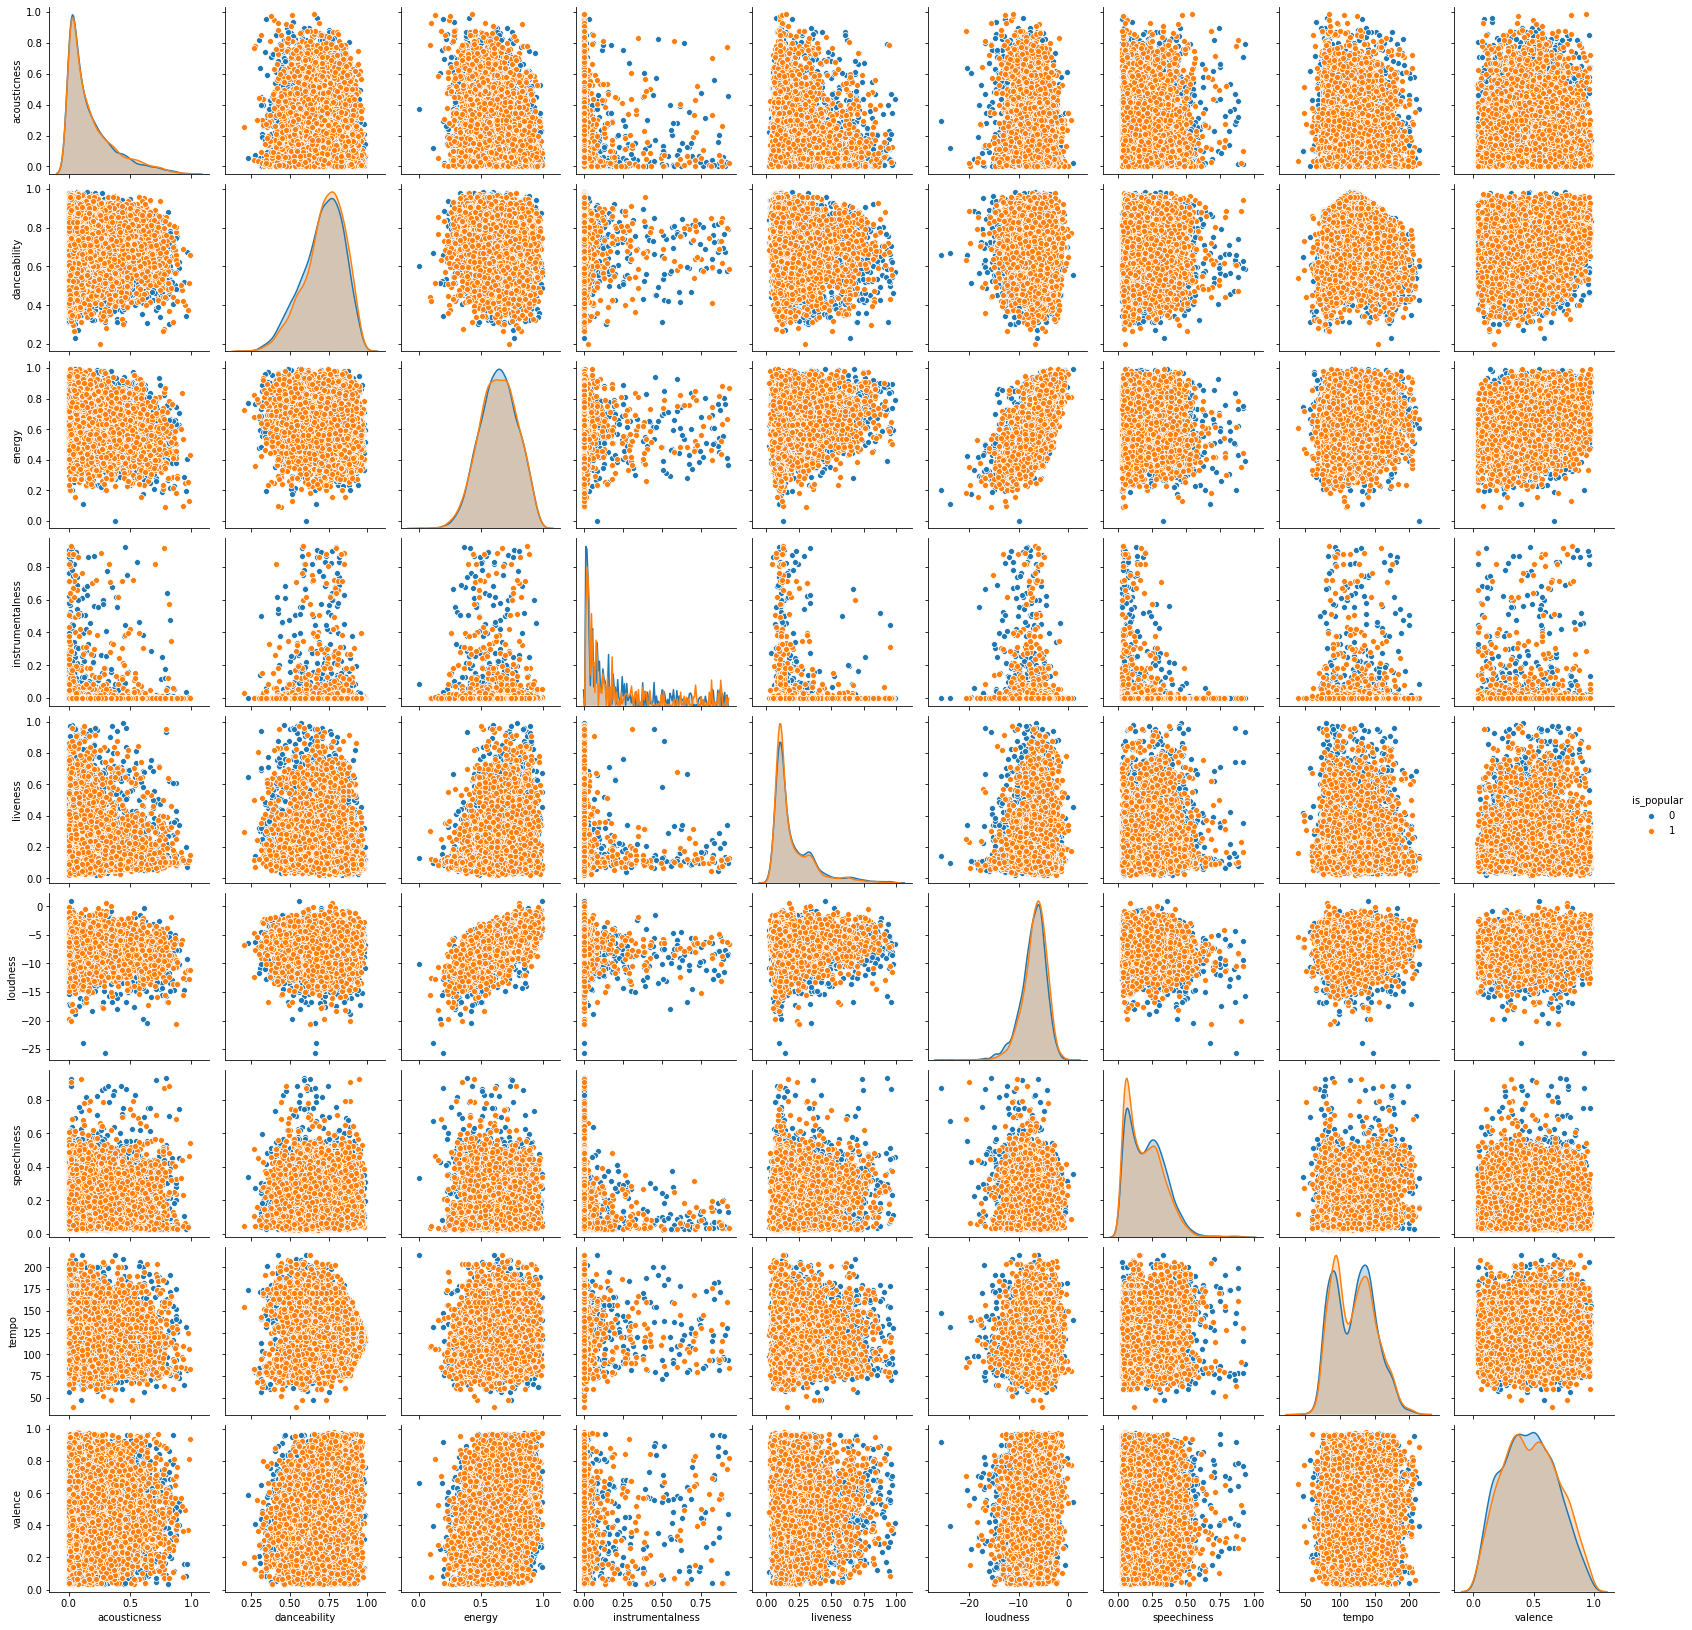

In [14]:
sns.pairplot(data, hue='is_popular')

Definitely need to examine these on a larger scale. I think the large number of data points is masking some of the points here. Maybe change size of markers or make transparent?

### Select Data

In [5]:
### select data
X = data.drop(columns=['genre', 'track_id', 'is_popular'])
y = data['is_popular']
### TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Linear Regression <a class="anchor" id="lr"></a>
<hr/>

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Training score: ', lr.score(X_train, y_train))
print('Testing score: ', lr.score(X_test, y_test))

Training score:  0.020007193791519273
Testing score:  0.01891210801510146


## Logistic Regression <a class="anchor" id="lgr"></a>
<hr/>

In [7]:
lgr = LogisticRegression(max_iter=1000)
lgr.fit(X_train, y_train)

print('Training score: ', lgr.score(X_train, y_train))
print('Testing score: ', lgr.score(X_test, y_test)) 

Training score:  0.5531487591450294
Testing score:  0.5469018932874354


In [8]:
pipe_lgr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
params_lgr = {
#     'selectkbest__k': [10],
#     'logisticregression__max_iter':[1000],
    'logisticregression__C': [0.01, 0.1, 1]
}

gs_lgr = GridSearchCV(pipe_lgr, params_lgr, n_jobs=-1)
gs_lgr.fit(X_train, y_train)

print('Training score: ', gs_lgr.score(X_train, y_train))
print('Testing score: ', gs_lgr.score(X_test, y_test))
print('Best Params', gs_lgr.best_params_)

Training score:  0.5538660163534643
Testing score:  0.5507745266781411
Best Params {'logisticregression__C': 0.01}


## KNN Classifier <a class="anchor" id="knn"></a>
<hr/>

In [12]:
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

params_knn = {
#     'selectkbest__k': [5, 10, 15],
    'kneighborsclassifier__n_neighbors': range(1, 150, 10),
}

gs_knn = GridSearchCV(pipe_knn, params_knn, n_jobs=-1)
gs_knn.fit(X_train, y_train)

print('Training score: ', gs_knn.score(X_train, y_train))
print('Testing score: ', gs_knn.score(X_test, y_test))
print('F1 score: ', f1_score(y, gs_knn.predict(X)))
print('Best Params', gs_knn.best_params_)

Training score:  0.5667766461052933
Testing score:  0.5516351118760757
F1 score:  0.6220692221808708
Best Params {'kneighborsclassifier__n_neighbors': 121}


## Tree Models <a class="anchor" id="trees"></a>
<hr/>

### Basic Decision Tree

In [13]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train, y_train)

print('Training Score: ', dt.score(X_train, y_train))
print('Testing Score: ', dt.score(X_test, y_test))

Training Score:  0.999282742791565
Testing Score:  0.5258175559380379


### Bagged Decision Tree

In [15]:
bag = BaggingClassifier()

bag.fit(X_train, y_train)

print('Training Score: ', bag.score(X_train, y_train))
print('Testing Score: ', bag.score(X_test, y_test))

Training Score:  0.9855114043896142
Testing Score:  0.5060240963855421


### Random Forest

In [16]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print('Training Score: ', rf.score(X_train, y_train))
print('Testing Score: ', rf.score(X_test, y_test))

Training Score:  0.999282742791565
Testing Score:  0.5417383820998278




### Ada Boost

In [17]:
ada = AdaBoostClassifier(n_estimators=100, random_state = 22)

ada.fit(X_train, y_train)

print('Training Score: ',ada.score(X_train, y_train))
print('Testing Score: ', ada.score(X_test, y_test))

Training Score:  0.6042174723855974
Testing Score:  0.5559380378657487


## Support Vector Machine <a class="anchor" id="svm"></a>
<hr/>

In [19]:
svm = SVC()

svm.fit(X_train, y_train)

print('Training Score: ', svm.score(X_train, y_train))
print('Testing Score: ', svm.score(X_test, y_test))

Training Score:  0.5251757280160666
Testing Score:  0.5292598967297762


## Evaluate Models <a class="anchor" id="eval"></a>
<hr/>

In [24]:
models = {
    'Logistic Regression' : lgr,
    'KNN': gs_knn,
    'Decision Tree': dt,
    'Bagged Decision Tree' : bag,
    'Random Forest': rf,
    'AdaBoost': ada,
    'SVC': svm
}

print('Classification Models: F1 Score')
print('----------------------------------------------------------------------')
print('{:^20s} | {:^14s} | {:^14s}| {:^14s}|'.format('Model', 'Training Score', 'Testing Score', 'Full Score'))
print('----------------------------------------------------------------------')

for model in models.keys():
    y_preds_test = models[model].predict(X_test)
    y_preds_train = models[model].predict(X_train)
    y_preds = models[model].predict(X)
    train_score = f1_score(y_train, y_preds_train)
    test_score = f1_score(y_test, y_preds_test)
    data_score = f1_score(y, y_preds)
    print('{:20s} | {:^14f} | {:^14f}| {:^14f}|'.format(str(model), train_score, test_score, data_score))
print('----------------------------------------------------------------------')

Classification Models: F1 Score
----------------------------------------------------------------------
       Model         | Training Score | Testing Score |   Full Score  |
----------------------------------------------------------------------
Logistic Regression  |    0.624925    |    0.620267   |    0.623759   |
KNN                  |    0.622877    |    0.619708   |    0.622069   |
Decision Tree        |    0.999317    |    0.544251   |    0.886287   |
Bagged Decision Tree |    0.986075    |    0.492485   |    0.868734   |
Random Forest        |    0.999317    |    0.583170   |    0.891657   |
AdaBoost             |    0.650892    |    0.603991   |    0.639262   |
SVC                  |    0.688676    |    0.692178   |    0.689553   |
----------------------------------------------------------------------
